# Memikat Pelanggan dan Meningkatkan Penjualan: Analisa Font pada Aplikasi Penjualan Makanan

## Konten <a id='back'></a>

* [Pendahuluan](#intro)
    * [Tujuan](#tujuan)
    * [Tahapan](#tahap)
* [Tahap 1: Memuat Data](#data)
    * [Memuat Library](#lib)
    * [Memuat Data](#data1)
* [Tahap 2: Eksplorasi data](#explore)
* [Tahap 3: Pra-pemrosesan data](#pra)
    * [Mengganti Nama Kolom](#pra1)
    * [Memperbaiki Tipe Data](#pra2)
    * [Membersihkan Data](#pra3)
    * [Menyiapkan Data](#pra4)
* [Tahap 4: Menganalisis Data](#analysis)
    * [Mempelajari Data](#analysis1)
    * [Mempelajari Event Funnel](#analysis2)
    * [Mempelajari Hasil Eksperimen](#analysis3)
* [Kesimpulan Umum](#end)

## Pendahuluan <a id='intro'></a>

Proyek analisis data yang dilakukan adalah untuk mengidentifikasi perilaku pengguna aplikasi dari sebuah startup yang menjual produk makanan. Tujuan dari analisis data ini adalah untuk mempelajari corong penjualan yang harus dilalui pengguna dalam mencapai tahap pembelian dan untuk menganalisis hasil A/A/B testing yang dilakukan oleh tim web designer dan product manager. Dalam eksperimen A/A/B testing, pengguna dibagi menjadi tiga kelompok, di mana dua kelompok kontrol diperlihatkan dengan versi font lama dan satu kelompok uji diperlihatkan dengan versi font terbaru. Tujuan dari analisis ini adalah untuk menentukan font manakah yang memberikan hasil terbaik bagi pengguna aplikasi.

Pada tahap awal proyek, analis mempelajari corong penjualan untuk mengetahui berapa banyak pengguna yang berhasil mencapai tahap pembelian dan berapa banyak yang terhenti pada tahap-tahap sebelumnya. Analisis ini dilakukan untuk mengidentifikasi faktor-faktor yang mungkin mempengaruhi perilaku pengguna dalam melakukan pembelian.

Selanjutnya, dilakukan analisis terhadap hasil A/A/B testing yang dilakukan oleh tim web designer dan product manager. Analisis ini dilakukan dengan membandingkan kedua kelompok kontrol untuk mengidentifikasi faktor-faktor yang mungkin mendistorsi hasil yang diperoleh dan untuk menentukan font manakah yang memberikan hasil terbaik bagi pengguna aplikasi. Selain itu, dengan membandingkan kedua kelompok kontrol, analis juga dapat memperoleh gambaran terkait berapa lama waktu dan data yang diperlukan saat menjalankan proses selanjutnya.

Untuk melakukan analisis data ini, digunakan dataset yang sama untuk melakukan analisis reguler dan analisis A/A/B. Hal ini dilakukan karena dalam proyek dunia nyata, eksperimen seperti ini dilakukan secara rutin dan analis perlu mempelajari kualitas aplikasi menggunakan data umum, tanpa memedulikan apakah pengguna berpartisipasi dalam eksperimen atau tidak.

Dengan melakukan analisis data yang komprehensif, diharapkan startup dapat meningkatkan kualitas aplikasinya dan meningkatkan penjualan produk makanannya. Analisis data ini diharapkan dapat memberikan wawasan yang berguna bagi perusahaan dalam mengambil keputusan strategis terkait dengan produk dan layanan yang ditawarkan.

### Tujuan: <a id='tujuan'></a>

- Mempelajari corong penjualan untuk mengetahui berapa banyak pengguna yang berhasil mencapai tahap pembelian dan berapa banyak yang terhenti pada tahap-tahap sebelumnya.

- Menganalisis hasil A/A/B testing untuk menentukan font manakah yang memberikan hasil terbaik bagi pengguna aplikasi.

- Mengidentifikasi faktor-faktor yang mungkin mempengaruhi perilaku pengguna dalam melakukan pembelian dan membandingkan kedua kelompok kontrol untuk mengidentifikasi faktor-faktor yang mungkin mendistorsi hasil yang diperoleh.

- Menentukan waktu dan data yang diperlukan saat menjalankan proses selanjutnya.

- Meningkatkan kualitas aplikasi dan meningkatkan penjualan produk makanan yang ditawarkan oleh startup.

- Memberikan wawasan yang berguna bagi perusahaan dalam mengambil keputusan strategis terkait dengan produk dan layanan yang ditawarkan.

### Tahapan: <a id='tahap'></a>
 
Proyek ini akan terdiri dari 4 tahap:

- Memuat data.
- Eksplorasi data.
- Pra-pemrosesan data.
- Menganalisis data.

## Tahap 1: Memuat Data <a id='data'></a>

### Memuat Library <a id='lib'></a>

In [710]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

import plotly.io as pio
pio.renderers.default = 'svg'

import warnings
warnings.filterwarnings('ignore')

### Memuat Data <a id='data1'></a>

In [711]:
# Memuat dataset
try:
    data = pd.read_csv('logs_exp_us.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/logs_exp_us.csv', delimiter='\t') 

##  Tahap 2: Eksplorasi Data  <a id='explore'></a>

Dataset berisi catatan log tindakan pengguna atau peristiwa yang terjadi dalam aplikasi atau situs web. Setiap baris pada dataset menunjukkan satu entri log dan terdiri dari empat kolom, yaitu:

- `EventName` — Nama peristiwa atau tindakan pengguna yang direkam dalam log.

- `DeviceIDHash` — ID unik pengguna yang melakukan tindakan tersebut. ID tersebut di-hash agar tidak mengungkapkan informasi pribadi pengguna.

- `EventTimestamp` — Waktu peristiwa atau tindakan pengguna yang direkam dalam log, dalam format timestamp.

- `ExpId` — Nomor eksperimen atau kelompok kontrol untuk tindakan pengguna tersebut. Terdapat tiga kelompok, yaitu 246 dan 247 untuk kelompok kontrol, dan 248 untuk kelompok uji.

In [712]:
# Memeriksa 5 data teratas
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [713]:
# Melihat ukuran datasetnya
data.shape

(244126, 4)

In [714]:
# Melihat informasi umumnya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [715]:
# Menghitung nilai yang hilang
data.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [716]:
# Memeriksa apakah ada data yang terduplikasi
data.duplicated().sum()

413

**Findings:**

Dataset tersebut berisikan informasi mengenai penggunaan aplikasi dari sebuah startup yang menjual produk makanan. Setiap entri log dalam dataset adalah catatan tindakan pengguna atau suatu peristiwa, seperti nama peristiwa, ID unik pengguna, waktu peristiwa, dan nomor eksperimen.

Berdasarkan eksplorasi data yang telah dilakukan, dapat disimpulkan bahwa dataset memiliki ukuran sebesar **244126** baris dan **4** kolom. Namun, tipe data dari kolom `EventTimestamp` masih salah, sehingga perlu dilakukan konversi ke dalam format waktu yang tepat. Selain itu, terdapat **413** data yang terduplikat, yang perlu dihapus untuk memastikan analisis data yang akurat. Oleh karena itu, sebelum melakukan analisis lebih lanjut, diperlukan pra-pemrosesan data untuk membersihkan dan memformat data dengan benar.

## Tahap 3: Pra-pemrosesan Data <a id='pra'></a>

### Mengganti Nama Kolom <a id='pra1'></a>


Sebelum melakukan pra-pemrosesan data, akan lebih baik apabila nama dari tiap kolom diganti menjadi *lowercase* dan menggunakan *Snake Case* untuk memudahkan proses penulisan kode.

In [717]:
# Mengganti nama kolom
data.columns = ['event', 'id', 'timestamp', 'exp_id']

In [718]:
# Melihat hasilnya
data.head()

,event,id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Nama kolom telah berhasil diganti menjadi `event`, `id`, `timestamp`, `exp_id`.

### Memperbaiki Tipe Data <a id='pra2'></a>

Yang perlu diperbaiki selanjutnya adalah tipe data dari kolom `timestamp` yang mana seharusnya adalah `datetime`.

Memperbaiki kolom `timestamp`:

In [719]:
# Mengubah tipe data `timestamp`
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Melihat hasilnya
data.head()

,event,id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [720]:
# Melihat hasilnya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      244126 non-null  object        
 1   id         244126 non-null  int64         
 2   timestamp  244126 non-null  datetime64[ns]
 3   exp_id     244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


Tipe data pada kolom `timestamp` telah diganti menjadi menjadi tipe data yang sesuai, yaitu `datetime64[ns]`.

### Membersihkan Data <a id='pra3'></a>

Pada tahap eksplorasi data, telah ditemukan adanya data yang terduplikat sebanyak **413** data. Data ini perlu dihilangkan agar proses analisa data mendaptkan hasil yang lebih akurat.

In [721]:
# Menghapus duplikat
data = data.drop_duplicates().reset_index(drop=True)

In [722]:
# Memastikan apakah masih ada data yang terduplikasi
data.duplicated().sum()

0

Sekarang datanya telah dibersihkan, dan bisa maju ke tahap selanjutnya yaitu menyiapkan data.

### Menyiapkan Data <a id='pra4'></a>

Hal yang harus disiapkan sebelum memulai proses analisa adalah membuat kolom baru yang hanya berisikan informasi tanggal tanpa adanya informasi waktu.

Mari buat kolomnya dan simpan dengan nama `date`:

In [723]:
# Memubat kolom `date`
data['date'] = data['timestamp'].dt.date

# Mengubah tipe datanya menjadi `datetime`
data['date'] = pd.to_datetime(data['date'])

In [724]:
# Memeriksa hasilnya
data.head()

,event,id,timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Dengan ini datanya telah siap untuk dianalisa.

## Tahap 4: Menganalisis Data <a id='analysis'></a>

### Mempelajari Data <a id='analysis1'></a>

Proses analisa pertama adalah mempelajari datanya mulai dari jumlah peristiwa, jumlah pengguna, priode waktu yang dicakup oleh data, dan distribusi dayanya.

**Jumlah peristiwa yang tercatat dalam log**

Menghitung jumlah peristiwa yang tercatat dalam dataset dengan melihat ukuran datasetnya.

In [725]:
print(f'Jumlah peristiwa yang tercatat dalam log adalah sebanyak {data.shape[0]} peristiwa.')

Jumlah peristiwa yang tercatat dalam log adalah sebanyak 243713 peristiwa.


**Jumlah pengguna yang tercatat dalam log**

Dengan menghitung jumlah nilai unik dari kolom `id`, maka akan diketahui jumlah pengguna yang tercatat dalam dataset.

In [726]:
print(f'Jumlah pengguna yang tercatat dalam log adalah sebanyak {data.id.nunique()} pengguna.')

Jumlah pengguna yang tercatat dalam log adalah sebanyak 7551 pengguna.


**Jumlah rata-rata peristiwa per pengguna**

Melakukan penghitungan jumlah rata-rata peristiwa per-pengguna dengan cara membagi jumlah peristiwa dengan jumlah pengguna.

In [727]:
print(f'Jumlah rata-rata peristiwa per-pengguna adalah sebanyak {round(data.shape[0] / data.id.nunique(),0)} peristiwa per-pengguna.')

Jumlah rata-rata peristiwa per-pengguna adalah sebanyak 32.0 peristiwa per-pengguna.


**Mempelajari priode waktu yang dicakup oleh data**

Mencari tahu priode waktu minimum yang dicakup oleh dataset:

In [728]:
print(f'Priode waktu minimumnya adalah: {data.timestamp.min()}')

Priode waktu minimumnya adalah: 2019-07-25 04:43:36


Mencari tahu priode waktu maksimum yang dicakup oleh dataset:

In [729]:
print(f'Priode waktu maksimumnya adalah: {data.timestamp.max()}')

Priode waktu maksimumnya adalah: 2019-08-07 21:15:17


Melihat distribusi data berdasarkan tanggal dan waktu:

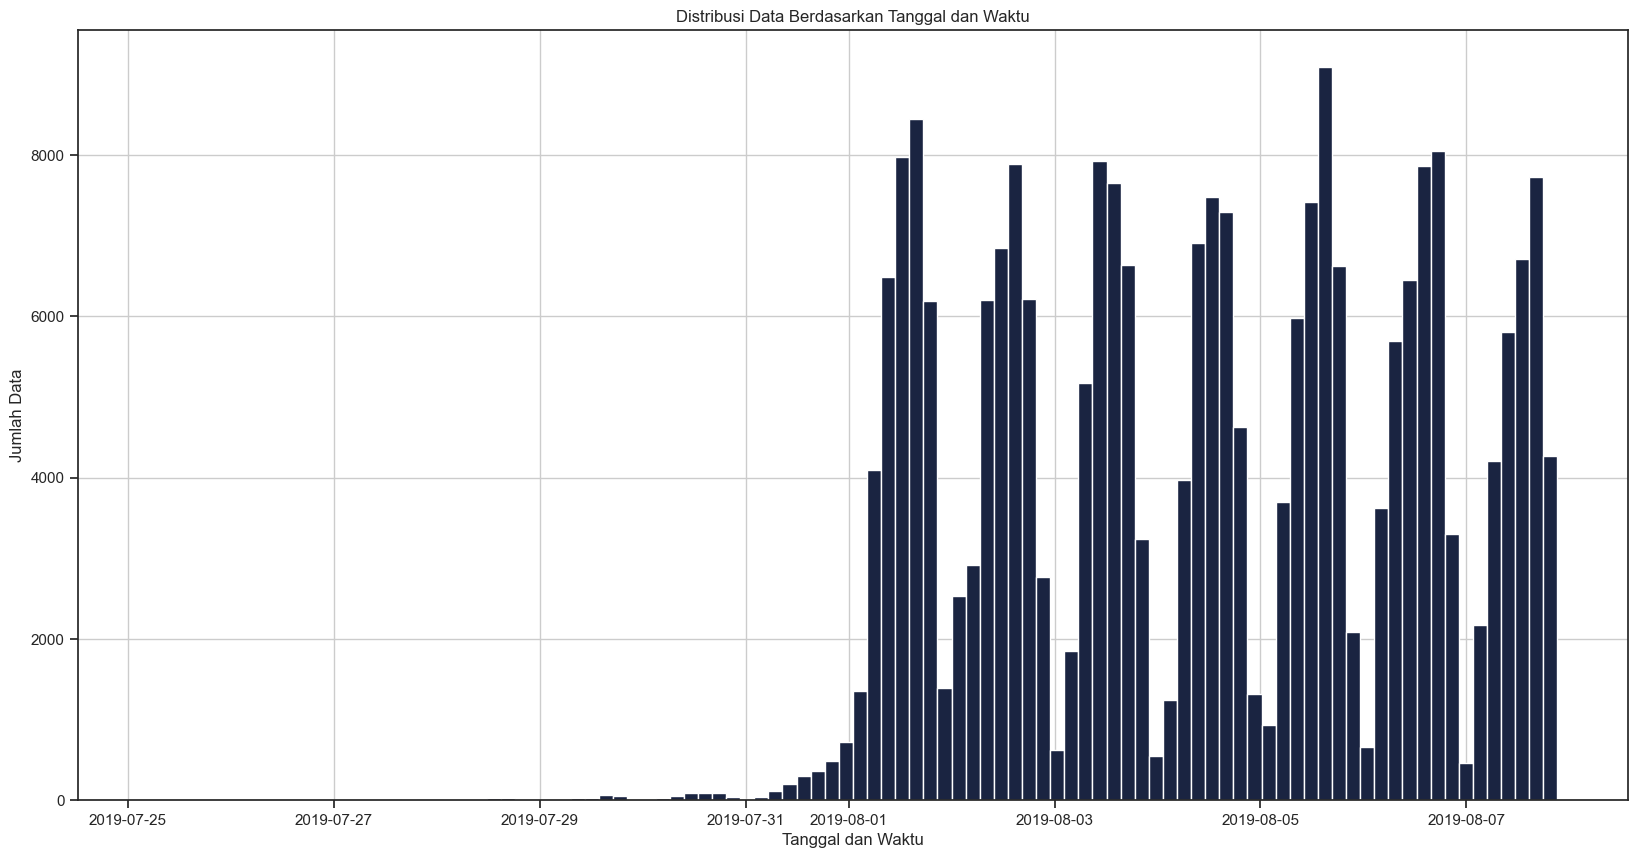

In [730]:
# Melihat distribusi data

sns.set_theme(style='ticks', palette='cubehelix')
plt.figure(figsize=(20,10))
data.timestamp.hist(bins=100)
plt.title('Distribusi Data Berdasarkan Tanggal dan Waktu')
plt.xlabel('Tanggal dan Waktu')
plt.ylabel('Jumlah Data')
plt.show()

Data di sebelum bulan Agustus 2019 terlihat belum lengkap, sebaliknya data yang ditunjukan setelah bulan agustus lebih stabil. Peristiwa terdahulu tersebut mungkin muncul di beberapa pengguna dikarenakan alasan teknis. Karena hal ini bisa mengacaukan distribusi data secara keseluruhan, maka data lama yang mana dalam hal ini adalah data sebelum bulan Agustus 2019 akan diabaikan.

Melakukan pemfilteran data:

In [731]:
# Memfilter data
data_filtered = data.query('date >= "2019-08-01"')
data_filtered.head()

,event,id,timestamp,exp_id,date
2826,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2827,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2828,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2829,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2830,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


**Apakah datanya berkurang drastis?**

Setelah datanya difilter, mari cari tahu apakah datanya berkurang drastis:

In [732]:
# Membandingkan ukuran kedua dataset
data.shape, data_filtered.shape

((243713, 5), (240887, 5))

In [733]:
# Menghitung presentase data yang hilang
(data.shape[0] - data_filtered.shape[0]) / data.shape[0] * 100

1.159560630741897

Data yang hilang hanyalah **1.16%**, ini merupakan jumlah yang sangat kecil sehingga tidak masalah untuk mengabaikan data lama sebelum bulan Agustus 2019.

Distribusinya juga terliat jauh lebih baik dari sebelumnya:

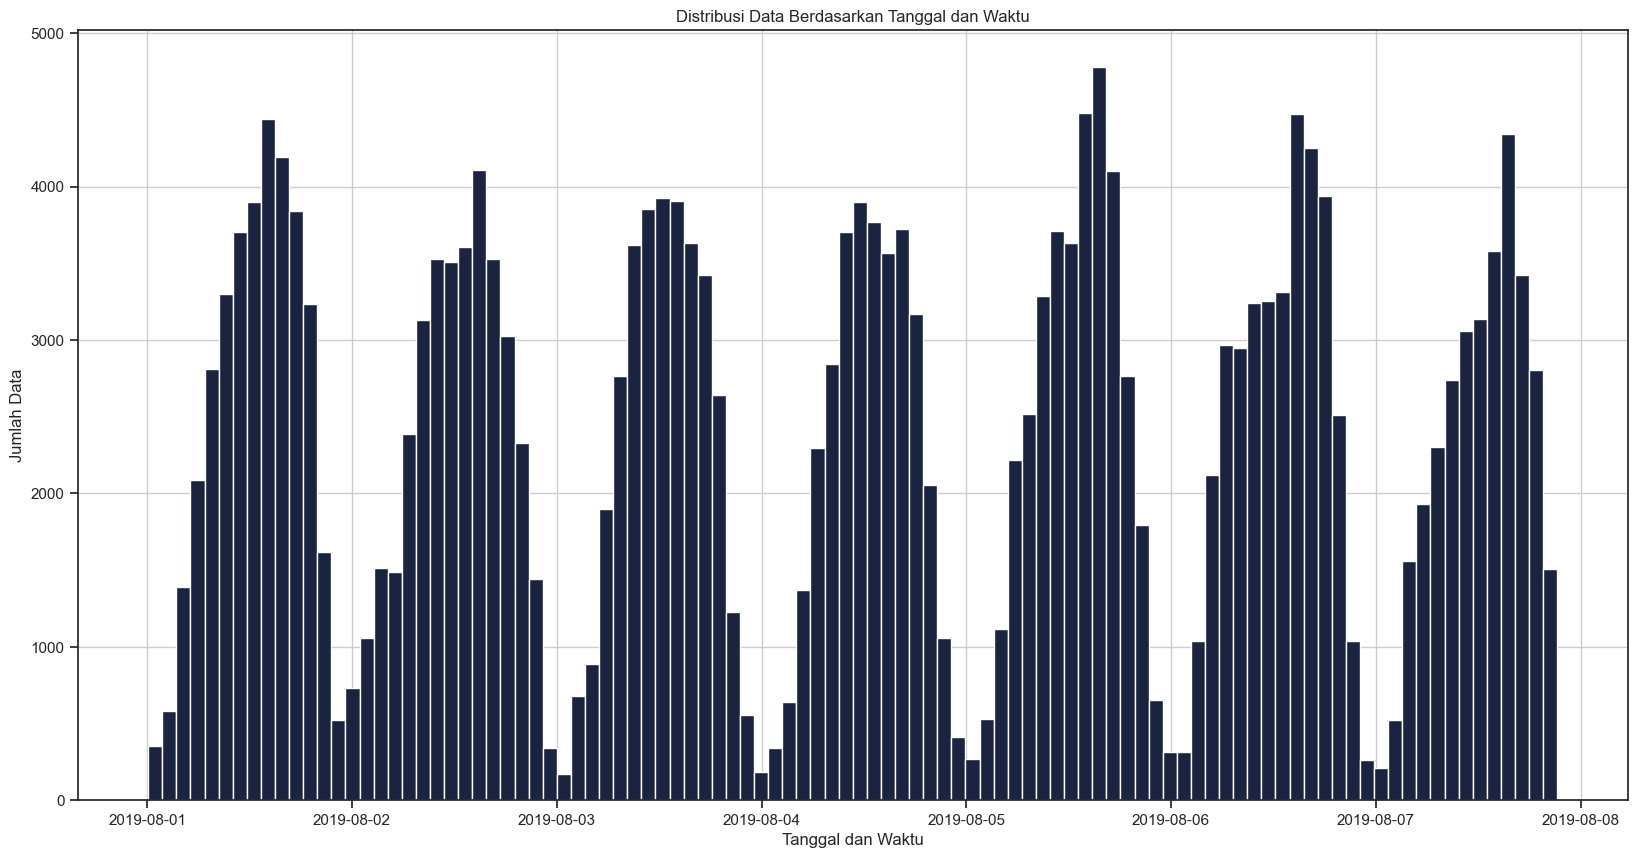

In [734]:
# Melihat distribusi dataset baru

plt.figure(figsize=(20,10))
data_filtered.timestamp.hist(bins=100)
plt.title('Distribusi Data Berdasarkan Tanggal dan Waktu')
plt.xlabel('Tanggal dan Waktu')
plt.ylabel('Jumlah Data')
plt.show()

**Memastikan apakah kita memiliki pengguna dari tiga kelompok eksperimen**

Untuk mencari tahu hal tersebut, perlu dilakukan penghitungan nilai dari masing-masing kelompok uji.

In [735]:
# Menghitung nlainya
data_filtered.exp_id.value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

- Kelompok uji `248` berjumlah **84563**.
- Kelompok uji `247` berjumlah **77022**.
- Kelompok uji `246` berjumlah **79302**.

**Findings:**

- Jumlah peristiwa yang tercatat dalam log adalah sebanyak **243713** peristiwa.
- Jumlah pengguna yang tercatat dalam log adalah sebanyak **7551** pengguna.
- Jumlah rata-rata peristiwa per-pengguna adalah sebanyak **32** peristiwa per-pengguna.
- Priode waktu minimumnya adalah: **2019-07-25 04:43:36**
- Priode waktu maksimumnya adalah: **2019-08-07 21:15:17**
- Data yang akan digunakan adalah data setelah bulan Agustus.
- Dataset yang telah difilter memiliki ketiga kelompok uji dengan komposisi sebagai berikut:

    - Kelompok uji `248` berjumlah **84563**.
    - Kelompok uji `247` berjumlah **77022**.
    - Kelompok uji `246` berjumlah **79302**.

### Mempelajari Event Funnel <a id='analysis2'></a>

Analisa selanjutnya adalah mempelajari **Event Funnel**, dengan mempelajari setiap peristiwa dan jumlah penggunanya terlebih dahulu. Dengan begitu visualisai datanya bisa dibuat dengan lebih akurat.

**Peristiwa yang ada dalam log**

Mempelajari peristiwa apa sajakah yang tercatat dalam dataset dan berapa kali peristiwa tersebut muncul:

In [736]:
data_filtered.pivot_table(index='event',values='id', 
                          aggfunc='count').sort_values('id', ascending=False)

,id
event,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


Terdapat 5 peristiwa dan masing masing pewristiwa telah dihitung jumlah kemunculannya.

**Jumlah pengguna di setiap peristiwa**

Menghitung jumlah pengguna di masing-masing peristiwa dan proporsi datanya:

In [737]:
id_per_event = (data_filtered
                .pivot_table(index='event', values='id', aggfunc='nunique')
                .sort_values('id', ascending=False))

# Menampilkan datanya
id_per_event

,id
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [738]:
# Menghitung proporsi pengguna
id_per_event / data_filtered.id.nunique() * 100

,id
event,
MainScreenAppear,98.473586
OffersScreenAppear,60.963632
CartScreenAppear,49.561986
PaymentScreenSuccessful,46.973719
Tutorial,11.149456


Semua peristiwa di atas dapat diurutkan menjadi **Event Funnel** dengan urutan sebagai berikut:

1. `MainScreenAppear` atau tampilan utama.
2. `OffersScreenAppear` atau halaman penawaran.
3. `CartScreenAppear` atau keranjang.
4. `PaymentScreenSuccessful` atau sukses melakukan pembayaran.

Sedangkan tutorial tidak akan dimasukan kedalam **Event Funnel** dikarenakan kemungkinan hanya pengguna baru yang melalui peristiwa tersebut, sehingga nilainya pun bisa dikatakan sebagai `outlier`.

**Event Funnel**

Karena peristiwa `tutorial` tidak masuk ke dalam funnel, maka perlu dilakukan penghapusan peristiwa tersebut terlebih dahulu.

In [739]:
# Membnuang tahap `tutorial`
event_funnel = id_per_event[:-1]. reset_index()
event_funnel

,event,id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


Setelah datanya siap, maka diagram corong bisa dibuat:

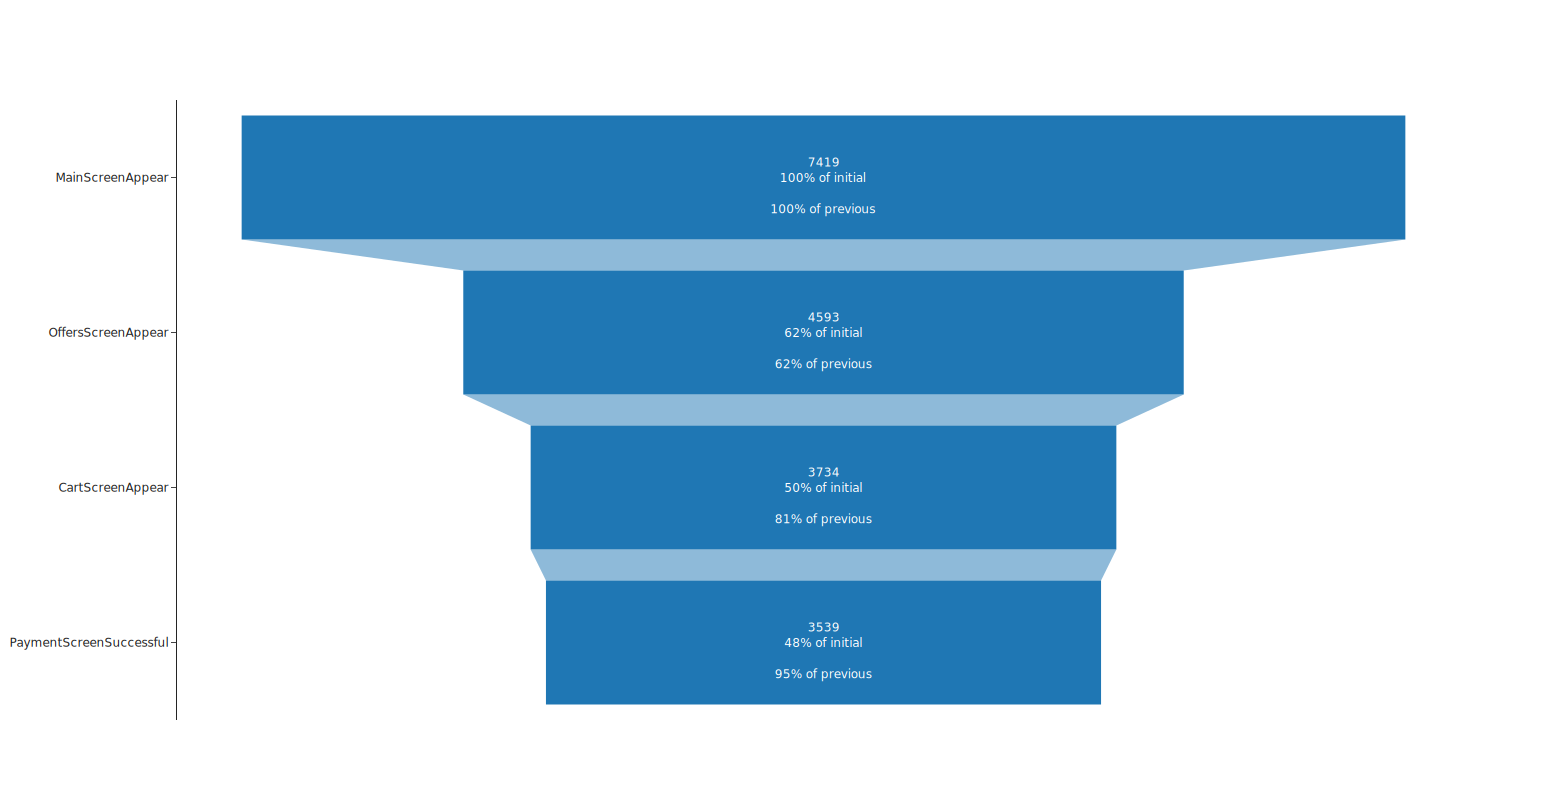

In [740]:
# Membuat diagram corong
fig = go.Figure(go.Funnel(
    y = event_funnel['event'],
    x = event_funnel['id'],
    textposition = 'inside',
    textinfo = 'value+percent initial+percent previous'))
fig.update_layout(template = 'simple_white')
fig.show(width = 1550, height = 800 )

**Findings:**

- Terdapat 5 peristiwa yang dicatat oleh log yaitu `MainScreenAppear`, `OffersScreenAppear`, `CartScreenAppear`, `PaymentScreenSuccessful`, dan `tutorial`.
- Walaupun terdapat 5 peristiwa, namun peristiwa yang termasuk ke dalam **Event Funnel** hanyalah 4 dikarenakan `tutorial` tidak ikut termasuk kedalam funnel.
- Setelah menganalisa dan membuat diagram corongnya ditemukan informasi sebagai beriukut:

    - `MainScreenAppear` sebagai peristiwa pertama memiliki jumlah pengguna sebanyak **7419** pengguna.
    - `OffersScreenAppear` sebagai peristiwa kedua memiliki jumlah pengguna sebanyak **4593** pengguna atau sebanyak **62%** dari tahap pertama.
    - `CartScreenAppear` sebagai peristiwa ketiga memiliki jumlah pengguna sebanyak **3734** pengguna atau sebanyak **81%** dari tahap kedua.
    - `PaymentScreenSuccessful` sebagai peristiwa terakhir memiliki jumlah pengguna sebanyak **3539** pengguna atau sebanyak **95%** dari tahap ketiga.
    - Presentase pengguna yang berhasil menyelesaikan tahap awal hingga akhir adalah sebanyak **48%**.

Dengan informasi tersebut, dapat disimpulkan bahwa banyak pengguna yang melakukan interaksi awal dengan aplikasi (Main Screen) namun hanya sebagian kecil dari mereka yang berhasil menyelesaikan proses pembayaran. Diperlukan analisa lebih lanjut untuk mengetahui faktor-faktor apa saja yang mempengaruhi tingkat konversi pengguna dari tahap satu hingga ke tahap akhir dan bagaimana cara meningkatkannya.

### Mempelajari Hasil Eksperimen <a id='analysis3'></a>

Terakhir, adalah melakukan analisa eksperimen yang telah dilakukan dengan melakukan uji statistik terhadap masing-masing kelompok eksperimen.

**Jumlah pengguna di setiap kelompok**

Sebelum melakukan uji statistik, mari cari tahu jumlah pengguna di masing-masing kelompok eksperimen:

In [741]:
# Menghitung jumlah pengguna di setiap kelompok
id_per_group = data_filtered.pivot_table(index='exp_id',
                                         values='id',
                                         aggfunc='nunique')

# Menampilkan hasilnya
id_per_group

,id
exp_id,
246,2484
247,2513
248,2537


Kelompok uji dengan id `246` memiliki **2484** pengunjung, sedangkan kelompok uji dengan id `247` memiliki **2513** pengunjung dan id `248` memiliki pengunjung sebanyak **2537**.

**Melakukan A/A Testing**

Melakukan uji statistik terhadap kedua kelompok uji antara sampel 246 dan 247, dan mencari tahu apakah terdapat perbedaan yang signifikan secara statistik. Namun sebelumnya perlu untuk mencari tahu jumlah pengguna dari setiap kejadian di masing-masing kelompok uji.

In [742]:
# Menghitung jumlah pengguna dari setiap kejadian di masing-masing kelompok uji
id_event_group = data_filtered.pivot_table(index='event', 
                                           values='id',
                                           columns='exp_id', 
                                           aggfunc='nunique').sort_values(by=246, ascending=False)

# Menampilkan hasilnya
id_event_group

exp_id,246,247,248
event,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


Jumlah pengguna setiap kejadian di masing-masing kelompok sudah didapatkan, dengan ini pengujian statistik dapat dilakukan. Seperti yang telah disinggung sebelumnya, sample `246` dan `247` merupakan kelompok eksperimen yang diperlihatkan dengan versi font lama sehingga dapat dikatakan uji statistik berikut merupakan **A/A test**. Uji statistik kali ini akan menggunakan **Z-test** untuk menguji hipotesis mengenai kesetaraan proporsi populasi dengan menggunalan alpha level 0.01.

In [743]:
# Membuat Z-test
def hypothesis_check(successes1, successes2, trials1, trials2, alpha=.01):

    # proporsi keberhasilan di kelompok pertama:
    p1 = successes1 / trials1

    # proporsi keberhasilan di kelompok kedua:
    p2 = successes2 / trials2

    # proporsi keberhasilan dalam dataset gabungan:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # perbedaan antara proporsi dataset
    difference = p1 - p2 

    # menghitung statistik dalam standar deviasi dari distribusi normal baku
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # mengatur distribusi normal baku (rata-rata 0, standar deviasi 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Menolak hipotesis nol: terdapat perbedaan yang signifikan di antara proporsinya")
    else:
        print("Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda")

In [744]:
# Membuat fungsi untuk menampilkan hasil test sekaligus
def event_hypothesis_check(id_event_group, id_per_group, event, exp1, exp2):

    frac1 = id_event_group.loc[event, exp1] / id_per_group.loc[exp1]
    frac2 = id_event_group.loc[event, exp2] / id_per_group.loc[exp2]

    print(f'event {event} group {exp1}')
    print(f'event {event} group {exp2}')

    hypothesis_check(successes1 = id_event_group.loc[event, exp1], 
                 successes2 = id_event_group.loc[event, exp2], 
                 trials1 = id_per_group.loc[exp1], 
                 trials2 = id_per_group.loc[exp2])

In [745]:
# Melakukan Z-test
for event in id_event_group.index:
    event_hypothesis_check(id_event_group, id_per_group, event, 246, 247)
    print('__________________________________________________________________')

event MainScreenAppear group 246
event MainScreenAppear group 247
p-value:  [0.75705972]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event OffersScreenAppear group 246
event OffersScreenAppear group 247
p-value:  [0.24809546]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event CartScreenAppear group 246
event CartScreenAppear group 247
p-value:  [0.22883372]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event PaymentScreenSuccessful group 246
event PaymentScreenSuccessful group 247
p-value:  [0.11456679]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
_____________________

Hasil A/A testing tersebut menunjukkan bahwa tidak ada perbedaan yang signifikan antara dua kelompok kontrol (group 246 dan 247) dalam hal proporsi pengguna yang mengalami event `MainScreenAppear`, `OffersScreenAppear`, `CartScreenAppear`, `PaymentScreenSuccessful`, dan `Tutorial`. Hal ini dilihat dari nilai p-value yang lebih besar dari 0,01 (tingkat signifikansi yang dipilih).

Dengan kata lain, kelompok kontrol berhasil dipertahankan sebagai kelompok yang seharusnya sama dan tidak ada faktor lain yang mempengaruhi hasil pengamatan. Oleh karena itu, eksperimen selanjutnya dapat dilakukan pada kelompok uji tanpa khawatir pengaruh dari faktor lain yang tidak diinginkan.

**Melakukan A/B Testing**

Hasil A/A testing menunjukan bahwa tidak ada perbedaan yang signifikan antara dua kelompok kontrol, sehingga eksperimen dapat dilanjutkan dengan A/B testing.

Eksperimen akan dilakukan sebanyak tiga kali, yaitu:

1. Uji statistik anatara kelompok kontrol 246 dengan 248.
2. Uji statistik anatara kelompok kontrol 247 dengan 248.
3. Uji statistik anatara gabungan kelompok kontrol 246 dan 247 dengan 248.

In [746]:
# Uji statistik anatara kelompok kontrol 246 dengan 248
for event in id_event_group.index:
    event_hypothesis_check(id_event_group, id_per_group, event, 246, 248)
    print('__________________________________________________________________')

event MainScreenAppear group 246
event MainScreenAppear group 248
p-value:  [0.29497219]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event OffersScreenAppear group 246
event OffersScreenAppear group 248
p-value:  [0.20836205]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event CartScreenAppear group 246
event CartScreenAppear group 248
p-value:  [0.07842923]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event PaymentScreenSuccessful group 246
event PaymentScreenSuccessful group 248
p-value:  [0.21225533]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
_____________________

Berdasarkan hasil A/B testing menggunakan Z-test antara group 246 dan group 248, tidak ditemukan perbedaan yang signifikan dalam proporsi kejadian di antara kelompok yang berbeda. Hal ini dapat dilihat dari nilai p-value yang besar pada setiap kejadian, yang menunjukkan bahwa tidak ada alasan untuk mempertimbangkan bahwa proporsi antara kelompok yang berbeda berbeda secara signifikan. Oleh karena itu, tidak ada kesimpulan yang dapat diambil bahwa satu font memberikan hasil yang lebih baik daripada yang lain.

In [747]:
# Uji statistik anatara kelompok kontrol 247 dengan 248
for event in id_event_group.index:
    event_hypothesis_check(id_event_group, id_per_group, event, 247, 248)
    print('__________________________________________________________________')

event MainScreenAppear group 247
event MainScreenAppear group 248
p-value:  [0.45870536]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p-value:  [0.91978178]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event CartScreenAppear group 247
event CartScreenAppear group 248
p-value:  [0.57861979]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p-value:  [0.73734151]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
_____________________

Berdasarkan hasil A/B testing menggunakan Z-test antara group 247 dan group 248, tidak ada perbedaan yang signifikan antara penggunaan dua jenis font untuk setiap event yang diamati, dengan semua p-value di atas alpha level 0.01. Oleh karena itu, hipotesis nol diterima, dan dapat disimpulkan bahwa tidak ada bukti signifikan untuk mendukung penggunaan salah satu jenis font untuk meningkatkan konversi pada setiap event yang diamati.

Sebelum melakukan A/B testing yang ketiga, perlu dilakukan penggabungan dataset antara kelompok kontrol 246 dan 247:

In [748]:
# Menggabungkan group 246 dan 247
combined_group = id_event_group.copy()
combined_group.loc[:,247] += combined_group.loc[:,246]
combined_group.drop(columns=246, inplace=True)

In [749]:
combined_group

exp_id,247,248
event,,
MainScreenAppear,4926,2493
OffersScreenAppear,3062,1531
CartScreenAppear,2504,1230
PaymentScreenSuccessful,2358,1181
Tutorial,561,279


In [750]:
# Menggabungkan pengguna 246 dan 247
combined_id = id_per_group.copy()
combined_id.loc[247] += combined_id.loc[246]
combined_id.drop(246, inplace=True)

In [751]:
combined_id

,id
exp_id,
247,4997
248,2537


Kedua kelompok kontrol telah digabungkan, A/B testing bisa dilanjutkan:

In [752]:
# Uji statistik anatara gabungan kelompok kontrol 246 dan 247 dengan 248
for event in id_event_group.index:
    event_hypothesis_check(combined_group, combined_id, event, 247, 248)
    print('__________________________________________________________________')

event MainScreenAppear group 247
event MainScreenAppear group 248
p-value:  [0.29424527]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p-value:  [0.4342555]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event CartScreenAppear group 247
event CartScreenAppear group 248
p-value:  [0.18175875]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
__________________________________________________________________
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p-value:  [0.60042943]
Gagal untuk menolak hipotesis nol: tidak ada alasan untuk mempertimbangkan bahwa proporsinya berbeda
______________________

Berdasarkan hasil A/B testing yang dilakukan dengan menggabungkan group 246 dan 247 serta membandingkannya dengan group 248 untuk mencari tahu font yang akan memberikan hasil terbaik, diperoleh informasi bahwa tidak terdapat perbedaan yang signifikan antara kedua group dalam hal proporsi kejadian pada setiap event yang diuji (`MainScreenAppear`, `OffersScreenAppear`, `CartScreenAppear`, `PaymentScreenSuccessful`, dan `Tutorial`). Hal ini dapat dilihat dari p-value yang diperoleh yang semuanya lebih besar dari 0.01, yang berarti gagal untuk menolak hipotesis nol bahwa tidak ada perbedaan yang signifikan antara proporsi kejadian di kedua group. Oleh karena itu, tidak ada bukti yang cukup untuk menyatakan bahwa salah satu font memberikan hasil yang lebih baik daripada yang lain, sehingga keputusan pemilihan font sebaiknya tidak didasarkan pada hasil A/B testing ini.

**Findings:**

Dari hasil uji statistik di atas dengan alpha level 0.01, dapat disimpulkan bahwa penggunaan font baru pada group 248 tidak memberikan perbedaan yang signifikan dalam hal interaksi pengguna dengan aplikasi dibandingkan dengan penggunaan font lama pada group 246 dan 247. Hal ini didasarkan pada hasil uji hipotesis yang menunjukkan tidak adanya perbedaan yang signifikan antara group 246 dan 247 dengan group 248 pada semua event yang diamati.

Namun, meskipun tidak ada perbedaan yang signifikan, rekomendasi yang bisa diberikan adalah tetap melakukan pengujian lebih lanjut jika memungkinkan, terutama dalam menguji faktor lain yang mungkin mempengaruhi interaksi pengguna dengan aplikasi, seperti tata letak atau warna. Selain itu, juga bisa dilakukan survei atau wawancara dengan pengguna untuk memperoleh insight lebih lanjut mengenai preferensi dan kebutuhan pengguna terkait tampilan aplikasi.

## Kesimpulan Umum <a id='end'></a>

Dataset yang digunakan dalam proyek ini adalah data log aktivitas pengguna sebuah aplikasi dari sebuah startup yang menjual produk makanan. Dataset ini mencatat aktivitas pengguna pada periode waktu antara 25 Juli 2019 hingga 7 Agustus 2019. Dataset ini terdiri dari 5 jenis peristiwa atau event yang dicatat dan terbagi menjadi tiga kelompok uji yang masing-masing memiliki jumlah pengguna yang berbeda dan menggunakan font yang berbeda pula.

Kelompok uji pertama (group 246) dan kedua (group 247) menggunakan font yang sama, yaitu font lama, sedangkan kelompok uji ketiga (group 248) menggunakan font baru. Dataset yang digunakan dalam proyek telah difilter untuk mengecualikan data pada periode waktu sebelum Agustus, sehingga hanya data pada periode Agustus yang digunakan..

Setelah melakukan analisa, dapat diambil kesimpulan sebagai berikut:

1. Dataset yang digunakan dalam proyek ini terdiri dari 243713 peristiwa dari 7551 pengguna dengan rata-rata 32 peristiwa per-pengguna. Data yang digunakan hanya data setelah bulan Agustus dan terdiri dari tiga kelompok uji, yaitu kelompok uji 248 (font baru) sebanyak 84563, kelompok uji 247 (font lama) sebanyak 77022, dan kelompok uji 246 (font lama) sebanyak 79302.
2. Dari analisis event funnel, didapatkan informasi bahwa dari 7419 pengguna yang mengunjungi `MainScreen`, sebanyak 4593 pengguna (62%) melanjutkan ke `OffersScreen`, 3734 pengguna (81%) dari `OffersScreen` lanjut ke `CartScreen`, dan 3539 pengguna (95%) dari `CartScreen` berhasil menyelesaikan pembayaran di `PaymentScreenSuccessful`. Presentase pengguna yang berhasil menyelesaikan seluruh funnel adalah sebanyak 48%.
3. Berdasarkan hasil uji A/A, tidak ditemukan perbedaan yang signifikan antara kelompok uji 246 dan 247 dalam hal konversi antar event funnel dengan nilai p-value yang lebih dari alpha level 0.01.
4. Berdasarkan hasil uji A/B, tidak ditemukan perbedaan yang signifikan antara kelompok uji 248 dan 247 dalam hal konversi antar event funnel dengan nilai p-value yang lebih dari alpha level 0.01.
5. Berdasarkan temuan kedua, ditemukan bahwa font lama dan baru tidak memiliki pengaruh yang signifikan terhadap konversi funnel.
6. Berdasarkan kesimpulan 3, 4, dan 5, dapat disimpulkan bahwa penggantian font tidak memberikan dampak yang signifikan terhadap konversi funnel.

Berdasarkan kesimpulan ini, dapat diketahui bahwa penggantian font pada aplikasi tidak mempengaruhi tingkat konversi secara signifikan. Meskipun terdapat perbedaan yang signifikan pada tahap-tahap awal funnel, namun hal tersebut tidak berdampak pada tingkat konversi akhir. Selain itu, hasil uji A/A testing menunjukkan bahwa pengukuran pada kedua kelompok kontrol yang sama menunjukkan hasil yang konsisten, sehingga dapat dianggap bahwa tidak terdapat perbedaan yang signifikan antara kedua kelompok kontrol.

[Kembali ke Daftar Isi](#back)